In [64]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [65]:
mnist = tf.keras.datasets.mnist
(train_images, _), (test_images, _) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [67]:
mnist = tf.keras.datasets.mnist
(train_images, _), (test_images, _) = mnist.load_data()

train_images = train_images.reshape(-1, 28, 28, 1) / 255.0
test_images = test_images.reshape(-1, 28, 28, 1) / 255.0

input_shape = (28, 28, 1)

# Модель автокодувальника
autoencoder = models.Sequential()

# Енкодер
autoencoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))
autoencoder.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))

# Декодер
autoencoder.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
autoencoder.add(layers.UpSampling2D((2, 2)))
autoencoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(layers.UpSampling2D((2, 2)))
autoencoder.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [68]:
history = autoencoder.fit(train_images, train_images, epochs=10, batch_size=128, shuffle=True, validation_data=(test_images, test_images))

Epoch 1/10
469/469 [==============================] - 103s 216ms/step - loss: 0.1295 - val_loss: 0.0811
Epoch 2/10
469/469 [==============================] - 100s 213ms/step - loss: 0.0785 - val_loss: 0.0750
Epoch 3/10
469/469 [==============================] - 99s 210ms/step - loss: 0.0741 - val_loss: 0.0722
Epoch 4/10
469/469 [==============================] - 100s 214ms/step - loss: 0.0722 - val_loss: 0.0709
Epoch 5/10
469/469 [==============================] - 100s 213ms/step - loss: 0.0711 - val_loss: 0.0699
Epoch 6/10
469/469 [==============================] - 100s 214ms/step - loss: 0.0702 - val_loss: 0.0692
Epoch 7/10
469/469 [==============================] - 100s 213ms/step - loss: 0.0696 - val_loss: 0.0687
Epoch 8/10
469/469 [==============================] - 101s 216ms/step - loss: 0.0690 - val_loss: 0.0683
Epoch 9/10
469/469 [==============================] - 100s 213ms/step - loss: 0.0686 - val_loss: 0.0679
Epoch 10/10
469/469 [==============================] - 100s 213ms

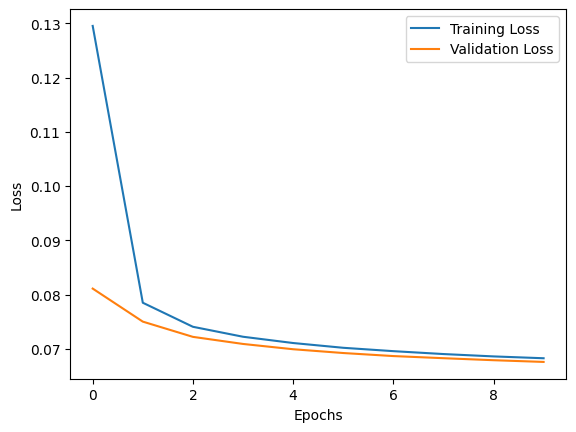

In [69]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 9s 29ms/step


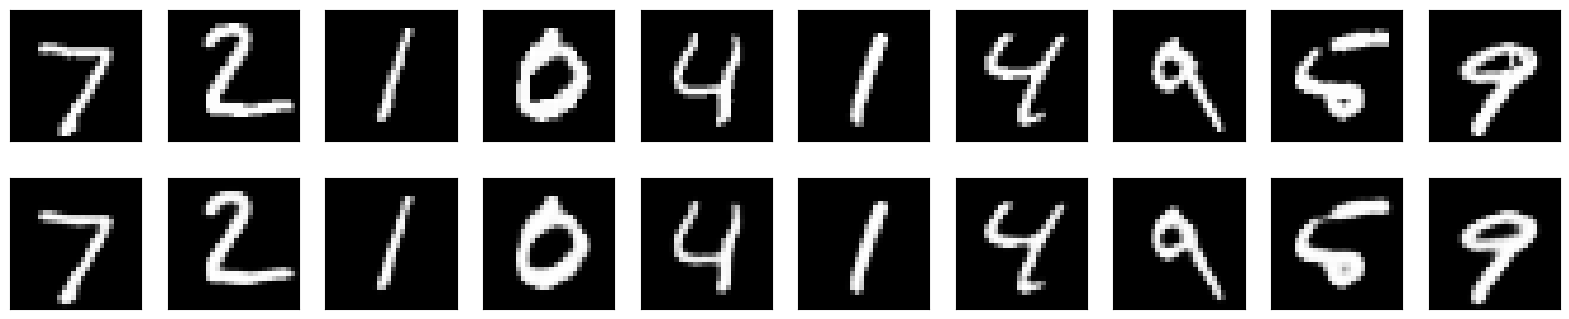

In [70]:
decoded_imgs = autoencoder.predict(test_images)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Відображення оригінальних зображень
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Відображення відтворених зображень
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Висновок

Функція втрат зменшується з кожною епохою навчання, що свідчить про успішне навчання моделі.
Відтворені зображення мають гарну якість, що свідчить про ефективність автокодувальника в зменшенні та відтворенні даних.
Використання згорткових шарів у моделі дозволяє автокодувальнику ефективно вивчати властивості вхідних зображень і створювати компактне представлення для них.
